In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
import joblib


In [2]:
from sklearn.impute import SimpleImputer

In [3]:
information = pd.read_csv("housing.csv")

In [4]:
information

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [5]:
information["median_income_cat"]= pd.cut(information["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

In [6]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in  split.split(information,information["median_income_cat"]):
    strat_train_data = information.iloc[train_index].drop("median_income_cat",axis=1)
    strat_test_data = information.iloc[test_index].drop("median_income_cat",axis=1)

In [7]:
strat_train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,268500,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,90400,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,140400,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,258100,<1H OCEAN


In [8]:
strat_test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,110000,<1H OCEAN
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,118800,<1H OCEAN
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,293800,<1H OCEAN
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,335700,<1H OCEAN


In [9]:
my_training_data = strat_train_data.copy()

In [10]:
my_training_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,268500,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,90400,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,140400,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,258100,<1H OCEAN


In [11]:
training_labels = my_training_data["median_house_value"].copy()

In [12]:
training_labels

12655     72100
15502    279600
2908      82700
14053    112500
20496    238300
          ...  
15174    268500
12661     90400
19263    140400
19140    258100
19773     62700
Name: median_house_value, Length: 16512, dtype: int64

In [13]:
training_features = my_training_data.drop("median_house_value",axis=1).copy()

In [14]:
training_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,INLAND
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,NEAR OCEAN
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,INLAND
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,NEAR OCEAN
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14,6665,1231.0,2026,1001,5.0900,<1H OCEAN
12661,-121.42,38.51,15,7901,1422.0,4769,1418,2.8139,INLAND
19263,-122.72,38.44,48,707,166.0,458,172,3.1797,<1H OCEAN
19140,-122.70,38.31,14,3155,580.0,1208,501,4.1964,<1H OCEAN


In [15]:
numerical_attributes = training_features.drop("ocean_proximity",axis=1).columns.tolist()

In [16]:
numerical_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [17]:
categorical_attributes = ["ocean_proximity"]

In [18]:
categorical_attributes

['ocean_proximity']

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [20]:
numerical_pipline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler()),
     ])

In [21]:
categorical_pipline = Pipeline([
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])

In [22]:
from sklearn.compose import ColumnTransformer


In [23]:
final_pipeline =ColumnTransformer([
    ("numerical",numerical_pipline,numerical_attributes),
    ("categorical",categorical_pipline,categorical_attributes)
])

In [24]:
my_prepared_data = final_pipeline.fit_transform(training_features)

In [25]:
my_prepared_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(my_prepared_data,training_labels)

LinearRegression()

In [27]:
linear_prediction = linear_regression_model.predict(my_prepared_data)

In [28]:
linear_mean_square_error = root_mean_squared_error(training_labels,linear_prediction)

In [29]:
cross_validiation_error = -cross_val_score(linear_regression_model,my_prepared_data,training_labels,scoring="neg_root_mean_squared_error",cv=10)

In [30]:
print(f"from this model we obtained the rmse error is {linear_mean_square_error}")

from this model we obtained the rmse error is 69050.56219504567


In [31]:
print(pd.Series(cross_validiation_error).describe())

count       10.000000
mean     69204.322755
std       2500.382157
min      65318.224029
25%      67124.346106
50%      69404.658178
75%      70697.800632
max      73003.752739
dtype: float64


In [32]:
Random_forest = RandomForestRegressor()

In [33]:
Random_forest.fit(my_prepared_data,training_labels)

RandomForestRegressor()

In [34]:
Random_forest_prediction= Random_forest.predict(my_prepared_data)

In [35]:
Random_forest_root_mean_square_error = root_mean_squared_error(training_labels,Random_forest_prediction)

In [36]:
print(f"The RMSE  error of this model is {Random_forest_root_mean_square_error}")

The RMSE  error of this model is 18493.51202042113


In [37]:
cross_validiation_error_random = -cross_val_score(Random_forest,my_prepared_data,training_labels,scoring = "neg_root_mean_squared_error",cv=10)

In [38]:
print(pd.Series(cross_validiation_error_random).describe())

count       10.000000
mean     49359.155697
std       2026.714639
min      46270.398634
25%      47841.511104
50%      49164.839954
75%      50592.313561
max      52989.238498
dtype: float64


In [40]:
final_model = Pipeline([
    ("preprocessing", final_pipeline),
    ("random_forest", RandomForestRegressor(n_estimators=100,random_state=42))
])

In [41]:
scores = cross_val_score(final_model,training_features,training_labels,scoring="neg_root_mean_squared_error",cv=10)

In [44]:
rmse_scores = -scores

In [46]:
print(rmse_scores)

[50842.25929218 48736.21982439 45939.13789086 50533.88252324
 47405.46903623 49610.34435098 51671.17833028 48620.51110178
 47379.77529752 53236.82572324]


In [47]:
print("CV RMSE Mean:", np.mean(rmse_scores))
print("CV RMSE Std:", np.std(rmse_scores))

CV RMSE Mean: 49397.56033707019
CV RMSE Std: 2106.530429964768


In [45]:
final_model.fit(training_features, training_labels)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('random_forest', RandomForestRegressor(random_state=42))])

In [49]:
test_features = strat_test_data.drop("median_house_value", axis=1)

In [50]:
test_features 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,<1H OCEAN
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,<1H OCEAN
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,<1H OCEAN
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,<1H OCEAN
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,<1H OCEAN
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,<1H OCEAN
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,<1H OCEAN
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,<1H OCEAN


In [51]:
test_labels = strat_test_data["median_house_value"].copy()

In [52]:
test_labels

5241     500001
17352    162500
3505     204600
7777     159700
14155    184000
          ...  
12182    110000
7275     118800
17223    293800
10786    335700
3965     215600
Name: median_house_value, Length: 4128, dtype: int64

In [63]:
test_predictions = final_model.predict(test_features)

In [64]:
test_rmse = np.sqrt(np.mean((test_predictions - test_labels) ** 2))

In [65]:
print(f"Final Test RMSE is {test_rmse}")

Final Test RMSE is 47197.66824186381


In [66]:
joblib.dump(final_model, "california_housing_model.pkl")
print("Model saved successfully.")

Model saved successfully.


In [67]:
test_Predictions = final_model.predict(test_features)

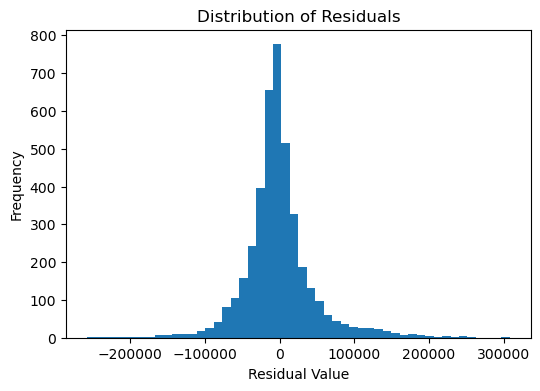

In [84]:
import matplotlib.pyplot as plt

residuals = test_labels - test_predictions
plt.figure(figsize=(6,4)) 
plt.hist(residuals, bins=50)
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")

plt.savefig("images/residual_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


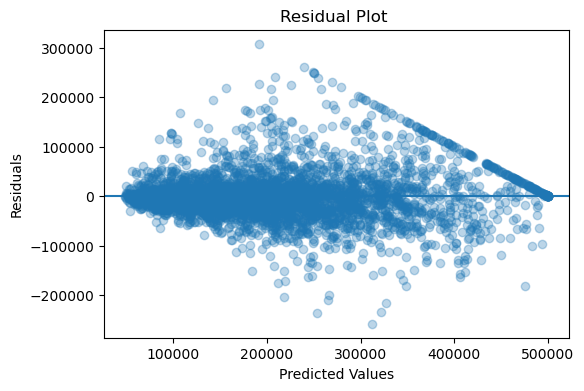

In [83]:
plt.figure(figsize=(6,4))   # width, height in inches
plt.scatter(test_predictions, residuals, alpha=0.3)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot ")

plt.savefig("images/residual_plot_clean.png", dpi=300, bbox_inches="tight")
plt.show()
